# Seaborn Library - Plotting with categorical data

http://seaborn.pydata.org/tutorial/categorical.html

Scatterplots & regression model plots can visualize the relationship between two variables. But they won't work when one of the main variables is categorical.

It's useful to divide `seaborn`'s categorical plots into three groups:

- those that show each observation at each level of the categorical variable. (functions **`swarmplot()`** and **`stripplot()`**)

- those that show an abstract representation of each distribution of observations (functions **`boxplot()`** and **`violinplot()`**)

- those that apply a statistical estimation to show a measure of central tendency and confidence interval (functions **`barplot()`** and **`pointplot()`**).

The functions above all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

It's easier and best to invoke these functions with a DataFrame that is in *tidy* format, althought the lower-level functions also accept wide-form DataFrames or simple vectors of observations.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))

mtcars = pd.read_csv("data/mtcars.csv")

In [2]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Categorical Scatterplots

A simple way to show the values of some quantitative variables across the levels of a categorical variable uses **`stripplot()`**, whichgeneralizes a scatterplot to the case where one of the variables is categorical.

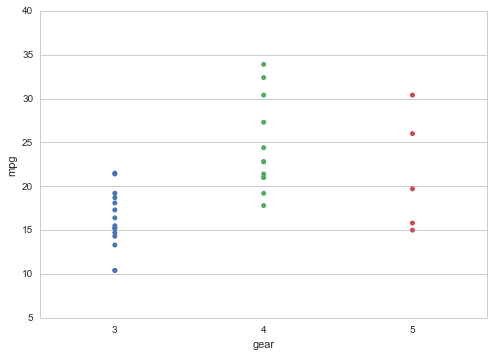

In [3]:
sns.stripplot(x = 'gear', y = 'mpg', data = mtcars)

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions using some random 'jitter':

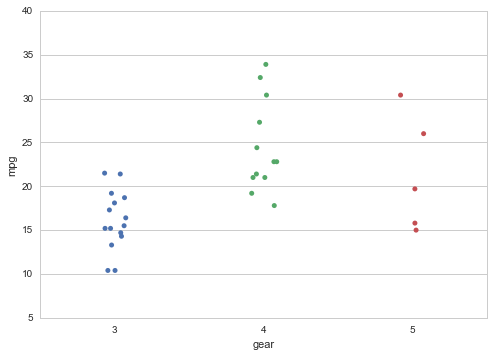

In [4]:
sns.stripplot(x = 'gear', y = 'mpg', data = mtcars, jitter=True)

A different approach would be to use function **`swarmplot()`**, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

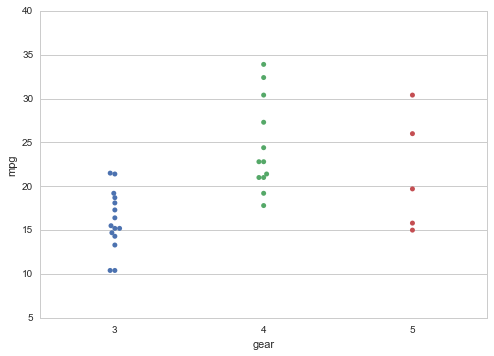

In [5]:
sns.swarmplot(x = 'gear', y = 'mpg', data = mtcars)

It's also possible to add a nested categorical variable with the **`hue`** parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables.

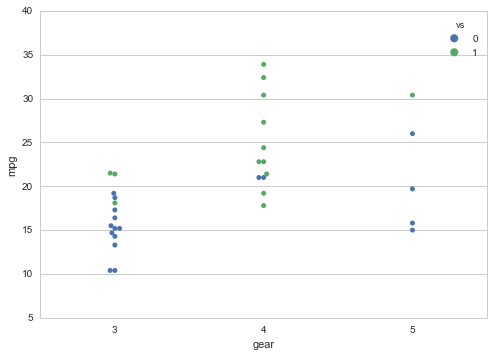

In [6]:
sns.swarmplot(x = 'gear', y = 'mpg', hue="vs", data = mtcars)

In general, the *seaborn* categorical plotting functions try to infer the order of categories from the data. If your data have a pandas `Categorical` datatype, then the default order of the categories can be set there. For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted.

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). you may force an orientation using **`orient`** keyword, but usually plot orientation can be inferred from the datatypes of the variales passed to *x* and/or *y*.

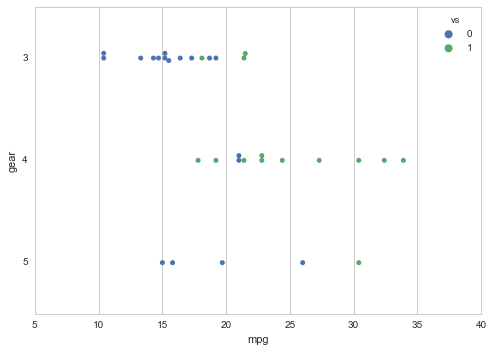

In [7]:
sns.swarmplot(x = 'mpg', y = 'gear', hue="vs", data = mtcars, orient='h')

## Distributions of Observations Within Categories

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

### Boxplots

Boxplots show the three quartile values of the distribution along with extreme values. The "Whiskers" extend the points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data.

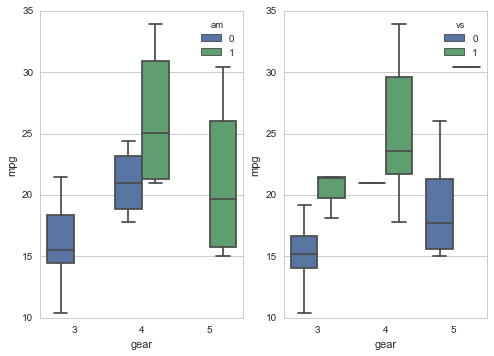

In [8]:
plt.subplot(121)
sns.boxplot(x='gear', y='mpg', hue='am', data = mtcars)

plt.subplot(122)
sns.boxplot(x='gear', y='mpg', hue='vs', data = mtcars)

### Violinplots

A different approach is a **`violinplot()`**, which combines a boxplot with the kernel density estimation procedure.

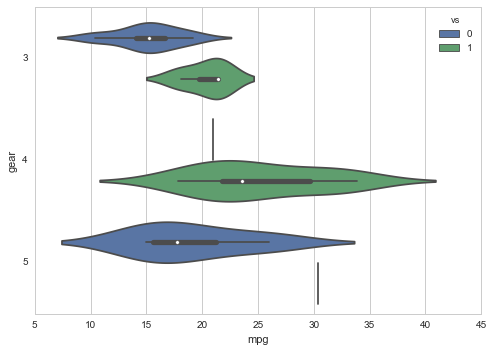

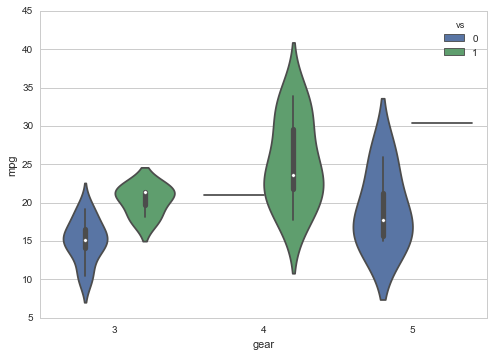

In [9]:
# the two plots are the same other than orientation.

plt.figure(1)
sns.violinplot(x = 'mpg', y='gear', hue = 'vs', data = mtcars, orient = 'h')


plt.figure(2)
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars)

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot.

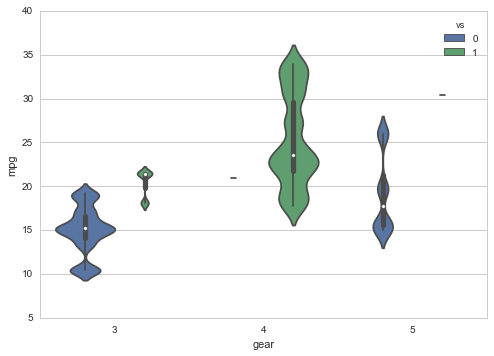

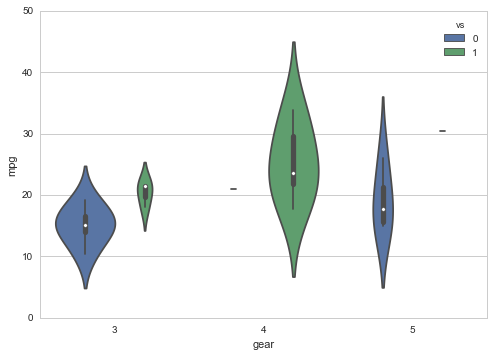

In [10]:
# The only difference between the plots below is 'bw' (bandwidth)

plt.figure(1)
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars,
              bw=0.2, scale = 'count', scale_hue = False)

plt.figure(2)
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars,
              bw=1, scale = 'count', scale_hue = False)

It's also possible to "split" the violins when the **`hue`** parameter has only two levels, which can allow for a more effecient use of space.

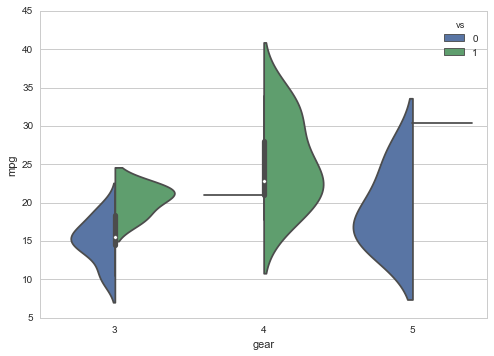

In [11]:
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars, split=True)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values.

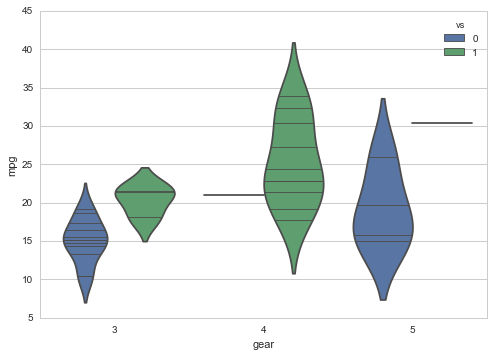

In [12]:
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars, inner = 'stick')

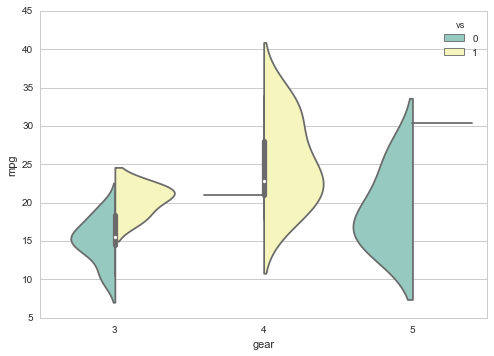

In [13]:
sns.violinplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars, palette='Set3', split=True)

It can also be useful to combine `stripplot()` or `swarmplot()` with `violinplot()` or `boxplot` to show each observation along with a summary of the distribution:

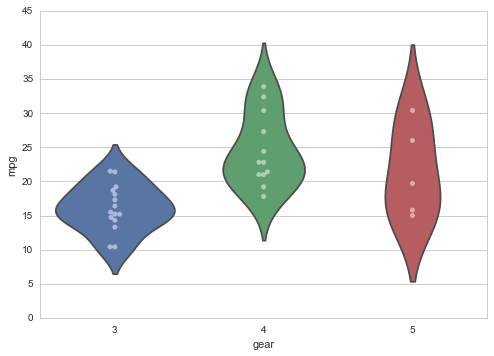

In [14]:
sns.violinplot(x = 'gear', y= 'mpg', data = mtcars, inner = None)
sns.swarmplot(x = "gear", y = 'mpg', data = mtcars, color='w', alpha = 0.5)

## Statistical Estimation within Categories

Often, rather than showing the distribution within each category, we may want to show the central tendency of the values. **Seaborn** has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar Plots

A familiar style of plot that accomplishes this goal is a bar plot. In **seaborn**, the **`barplot()`** function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars;

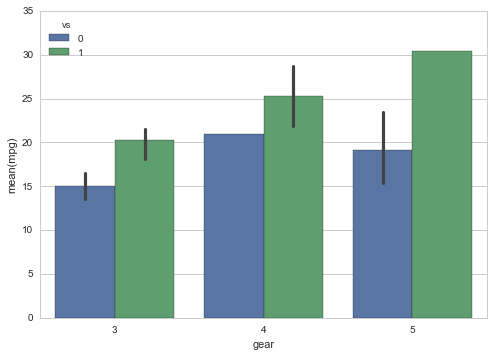

In [15]:
sns.barplot(x = 'gear', y='mpg', hue = 'vs', data = mtcars)

In [16]:
# Compare the error bars and the standard deviation.
mtcars.groupby('gear').std()['mpg']

gear
3    3.371618
4    5.276764
5    6.658979
Name: mpg, dtype: float64

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In *seaborn*, it's easy to do so with the `countplot` function:

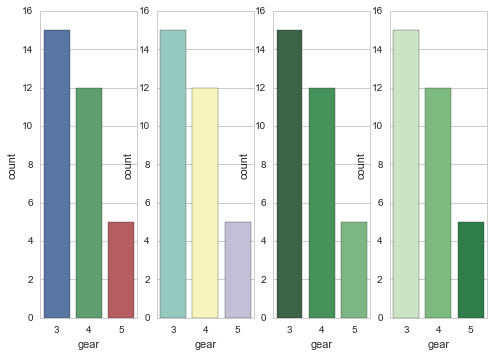

In [17]:
plt.subplot(141)
sns.countplot(x="gear", data = mtcars)

plt.subplot(142)
sns.countplot(x="gear", data = mtcars, palette="Set3")

plt.subplot(143)
sns.countplot(x="gear", data = mtcars, palette="Greens_d")

plt.subplot(144)
sns.countplot(x="gear", data = mtcars, palette="Greens")

Both **`barplot()`** and **`countplot()`** can be invoked with all fo the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

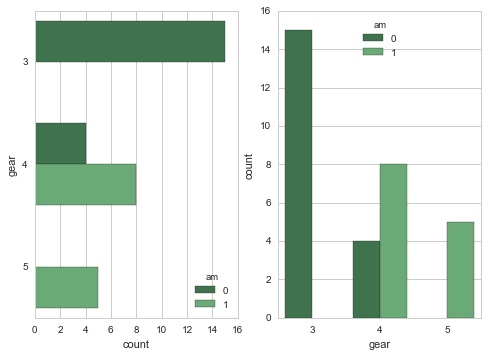

In [18]:
# The same plots, but different orientation directions
plt.subplot(121)
sns.countplot(y = mtcars.gear, hue = mtcars.am, palette="Greens_d")

plt.subplot(122)
sns.countplot(x = mtcars.gear, hue = mtcars.am, palette="Greens_d")

### Point Plots

point plots also encode the value of the estimate with height on the other axis, but rather than show a full bar, it just plots the **point estimate** and **confidence interval**. Additionally, pointplot connects points from the same **`hue`** category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differentces of slopes.

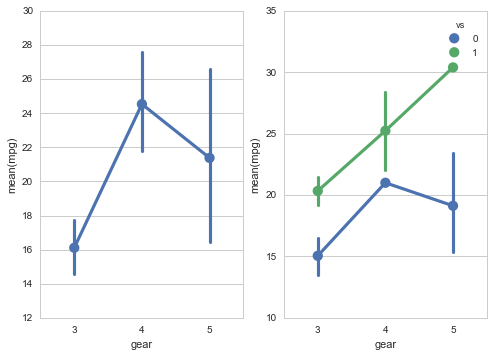

In [19]:
plt.subplot(121)
sns.pointplot(x = 'gear', y = 'mpg', data = mtcars)

plt.subplot(122)
sns.pointplot(x = 'gear', y = 'mpg', hue = 'vs', data = mtcars)

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the **`hue`** category.

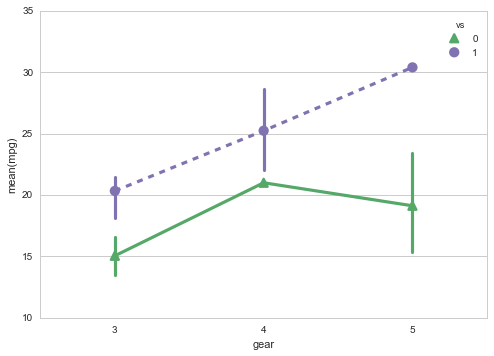

In [20]:
sns.pointplot(x='gear', y="mpg", hue = "vs", data = mtcars, 
              palette={0:"g", 1:"m"}, # different colors
              markers=["^", "o"], linestyles=["-", "--"])

## Plotting "Wide-Form" Data

While using "long form" or "tidy" data is preferred, these functions can also be applied to "wide-form" data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays.  These objects should be passed directly to the **`data`** parameter.

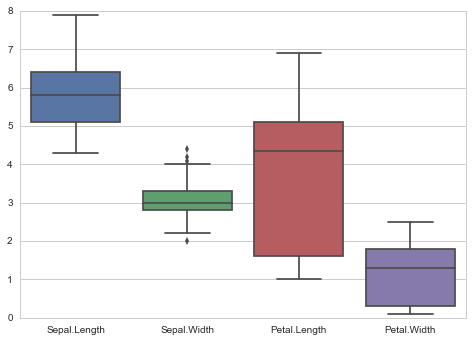

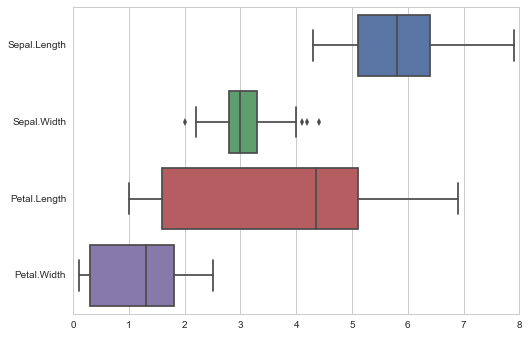

In [21]:
dat_iris = pd.read_csv("data/iris.csv")

plt.figure(1)
sns.boxplot(data = dat_iris)

plt.figure(2)
sns.boxplot(data = dat_iris, orient="h")

To control the size & shape of plots made by the functions discussed above, we must set up the figure by ourselves using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots

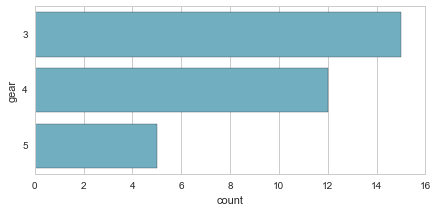

In [22]:
f, ax = plt.subplots(figsize=(7,3))
sns.countplot(y = "gear", data=mtcars, color="c")

## Drawing Multi-Panel Categorical Plots

As mentioned, there are two ways to draw categorical plots in *seaborn*. Similar to the duality in the regression plots, we can eigher use functions introduced above, or the higher-level function **`factorplot()`**, which combines these functions with a *FacetGrid()* to add the ability to examine additional categories through the larger structure of the figure. By default, *factorplot()* produces a *pairplot()*

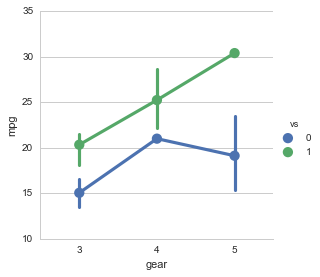

In [23]:
sns.factorplot(x = 'gear', y = 'mpg', hue = 'vs', data = mtcars)

However, **`kind`** parameter can help choose any of the kinds of plots discussed above

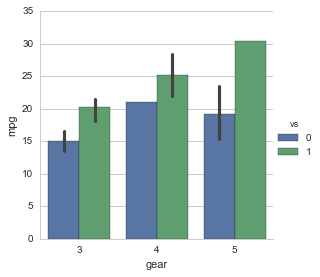

In [24]:
sns.factorplot(x = 'gear', y = 'mpg', hue = 'vs', data = mtcars, kind="bar")

The main advantage of using **`factorplot()`** is that it's very easy to "facet" the plot and investigate the role of other categorical variables

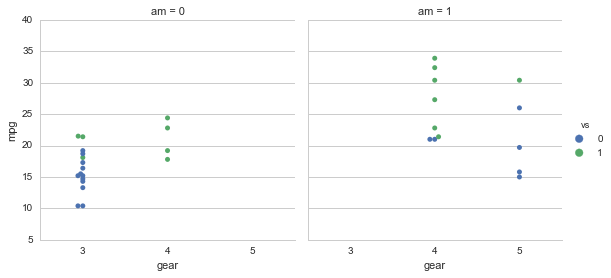

In [25]:
sns.factorplot(x = 'gear', y = 'mpg', hue = 'vs', col="am", data = mtcars, kind="swarm")

Any kind of plot can be drawn. Because of the way **`FacetGrid`** works, to change the size and shape of the figure we need to specify the **size** and **aspect** arguments, which apply to each facet

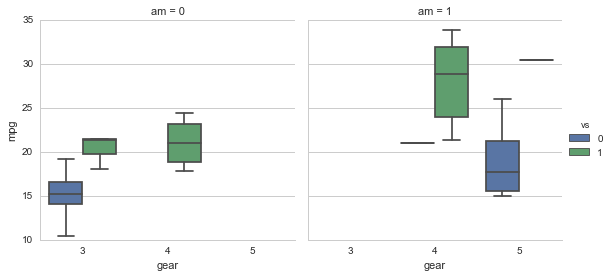

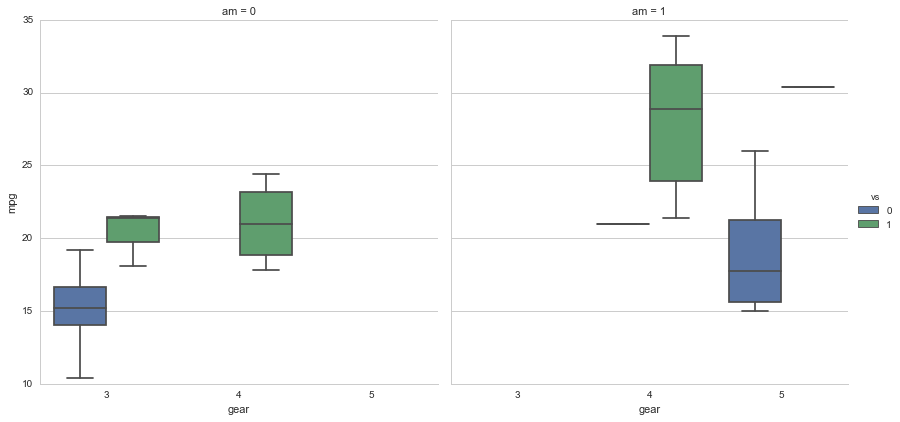

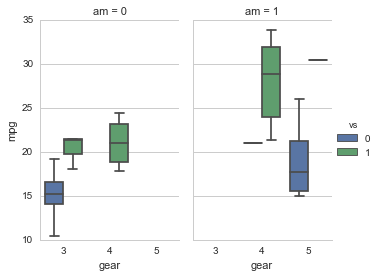

In [26]:
plt.figure(1)
sns.factorplot(x = "gear", y = "mpg", hue = "vs", col = "am", data = mtcars,
              kind = "box", size = 4)

plt.figure(3)
sns.factorplot(x = "gear", y = "mpg", hue = "vs", col = "am", data = mtcars,
              kind = "box", size = 6)

plt.figure(3)
sns.factorplot(x = "gear", y = "mpg", hue = "vs", col = "am", data = mtcars,
              kind = "box", size = 4, aspect=0.6)

Because of the generalized API for the categorical plots, they should be easy to apply to other more complex contexts. For instance, they're easily combined with a **PairGrid** to show categorical relationships across several different variables.

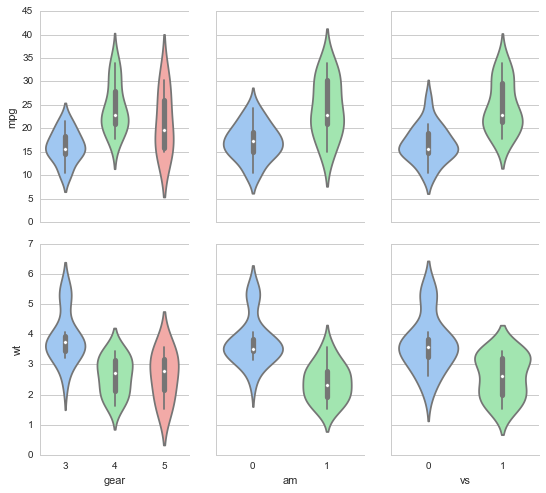

In [27]:
g = sns.PairGrid(mtcars,
                x_vars = ["gear", "am", "vs"],
                y_vars = ["mpg", 'wt'],
                aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")